In [78]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata_df = pd.read_csv(mouse_drug_data_to_load)
clinicaldata_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = cd_df.merge(mousedata_df, on="Mouse ID", how = 'inner')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [62]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mtv_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mtv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [63]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_tumor_volume = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
error_tumor_volume_df = pd.DataFrame(error_tumor_volume)


# Preview DataFrame
etv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [64]:
# Minor Data Munging to Re-Format the Data Frames
merged_df_mung = pd.pivot_table(merged_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
merged_df_mung = merged_df_mung.loc[ : , 'Tumor Volume (mm3)']
merged_df_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [65]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin = merged_df_mung[["Capomulin"]]
capomulin_list = capomulin['Capomulin'].tolist()
capomulin_sem = std_error_tumor_volume[["Capomulin"]]
capomulin_list_sem = capomulin_sem ['Capomulin'].tolist()

infubinol = merged_df_mung[["Infubinol"]]
infubinol_list = infubinol['Infubinol'].tolist()
infubinol_sem = std_error_tumor_volume[["Infubinol"]]
infubinol_list_sem = infubinol_sem ['Infubinol'].tolist()

ketapril = merged_df_mung[["Ketapril"]]
ketapril_list = ketapril['Ketapril'].tolist()
ketapril_sem = std_error_tumor_volume[["Ketapril"]]
ketapril_list_sem = ketapril_sem ['Ketapril'].tolist()

placebo = merged_df_mung[["Placebo"]]
placebo_list = placebo['Placebo'].tolist()
placebo_sem = std_error_tumor_volume[["Placebo"]]
placebo_list_sem = placebo_sem ['Placebo'].tolist()

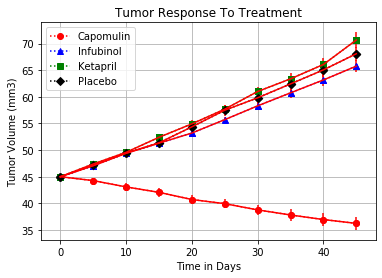

In [66]:
# Generate the Plot (with Error Bars)
x_limit = 50
x_axis = np.arange(0, x_limit, 5)


# Array for values
plt.scatter(x_axis, capomulin_list, marker='o', color='red')
plt.plot(x_axis, capomulin_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, capomulin_list, yerr=capomulin_list_sem, color='red')

plt.scatter(x_axis, infubinol_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_list, yerr=infubinol_list_sem, color='red')

plt.scatter(x_axis, ketapril_list, marker='s', color='green')
plt.plot(x_axis,ketapril_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_list, yerr=ketapril_list_sem, color='red')

plt.scatter(x_axis, placebo_list, marker='D', color='black')
plt.plot(x_axis, placebo_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, placebo_list, yerr=placebo_list_sem, color='red')

plt.title("Tumor Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the figure
plt.savefig('tumor-response-to-treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [67]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mms_df = pd.DataFrame(mean_metastatic_sites)

# Preview DataFrame
mms_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [71]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
mse_df = pd.DataFrame(metastatic_error)

# Preview DataFrame
mse_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [72]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mung = pd.pivot_table(merged_df, index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
metastatic_mung = metastatic_mung.loc[ : , 'Metastatic Sites']
metastatic_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


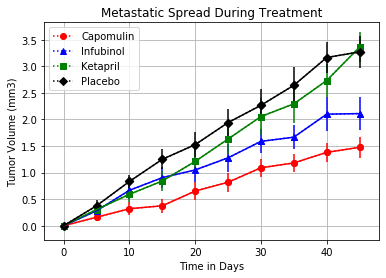

In [73]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin_metastatic_mung = metastatic_mung[["Capomulin"]]
capomulin_metastatic_mung_list = capomulin_metastatic_mung['Capomulin'].tolist()
capomulin_metastatic_mung_sem = metastatic_std_error[['Capomulin']]
capomulin_metastatic_mung_sem_list = capomulin_metastatic_mung_sem['Capomulin'].tolist()

infubinol_metastatic_mung = metastatic_mung[["Infubinol"]]
infubinol_metastatic_mung_list = infubinol_metastatic_mung['Infubinol'].tolist()
infubinol_metastatic_mung_sem = metastatic_std_error[['Infubinol']]
infubinol_metastatic_mung_sem_list = infubinol_metastatic_mung_sem['Infubinol'].tolist()

ketapril_metastatic_mung = metastatic_mung[["Ketapril"]]
ketapril_metastatic_mung_list = ketapril_metastatic_mung['Ketapril'].tolist()
ketapril_metastatic_mung_sem = metastatic_std_error[['Ketapril']]
ketapril_metastatic_mung_sem_list = ketapril_metastatic_mung_sem['Ketapril'].tolist()

placebo_metastatic_mung = metastatic_mung[["Placebo"]]
placebo_metastatic_mung_list = placebo_metastatic_mung['Placebo'].tolist()
placebo_metastatic_mung_sem = metastatic_std_error[['Placebo']]
placebo_metastatic_mung_sem_list = placebo_metastatic_mung_sem['Placebo'].tolist()

# Generate the Plot (with Error Bars)
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_metastatic_mung_list, marker='o', color='red')
plt.plot(x_axis, capomulin_metastatic_mung_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, capomulin_metastatic_mung_list, yerr=capomulin_metastatic_mung_sem_list, color='red')

plt.scatter(x_axis, infubinol_metastatic_mung_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_metastatic_mung_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_metastatic_mung_list, yerr=infubinol_metastatic_mung_sem_list, color='blue')

plt.scatter(x_axis, ketapril_metastatic_mung_list, marker='s', color='green')
plt.plot(x_axis, ketapril_metastatic_mung_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_metastatic_mung_list, yerr=ketapril_metastatic_mung_sem_list, color='green')

plt.scatter(x_axis, placebo_metastatic_mung_list, marker='D', color='black')
plt.plot(x_axis, placebo_metastatic_mung_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, placebo_metastatic_mung_list, yerr=placebo_metastatic_mung_sem_list, color='black')

plt.title("Metastatic Spread During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig('metastatic-spread-during-treatment.png')

# Show the Figure
plt.grid()
plt.legend()
plt.show()

## Survival Rates

In [74]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [75]:
# Minor Data Munging to Re-Format the Data Frames
micecountmung = pd.pivot_table(mice_count_df, index=['Timepoint'], columns=['Drug'])

# Preview the Data Frame
mice_count_mung = micecountmung.loc[:, 'Mouse ID']
mice_count_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


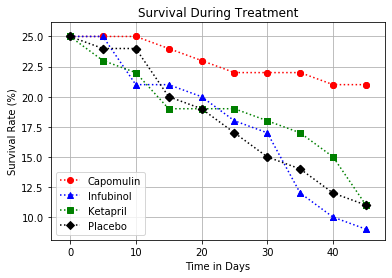

In [58]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin_micecount_mung = mice_count_mung[["Capomulin"]]
capomulin_micecount_mung_list = capomulin_micecount_mung['Capomulin'].tolist()

infubinol_micecount_mung = mice_count_mung[["Infubinol"]]
infubinol_micecount_mung_list = infubinol_micecount_mung['Infubinol'].tolist()

ketapril_micecount_mung = mice_count_mung[["Ketapril"]]
ketapril_micecount_mung_list = ketapril_micecount_mung['Ketapril'].tolist()

placebo_micecount_mung = mice_count_mung[["Placebo"]]
placebo_micecount_mung_list = placebo_micecount_mung['Placebo'].tolist()

# Generate the Plot (Accounting for percentages)
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_micecount_mung_list, marker='o', color='red')
plt.plot(x_axis, capomulin_micecount_mung_list, 'r:o', label='Capomulin')

plt.scatter(x_axis, infubinol_micecount_mung_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_micecount_mung_list, 'b:^', label='Infubinol')

plt.scatter(x_axis, ketapril_micecount_mung_list, marker='s', color='green')
plt.plot(x_axis, ketapril_micecount_mung_list, 'g:s', label='Ketapril')

plt.scatter(x_axis, placebo_micecount_mung_list, marker='D', color='black')
plt.plot(x_axis, placebo_micecount_mung_list, 'k:D', label='Placebo')

plt.title("Survival During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('survival-during-treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [76]:
# Calculate the percent changes for each drug
# Calculate the percent changes for each drug
mean_tumor_vol_df = mean_tumor_volume_df.loc[:, 'Tumor Volume (mm3)']

capomulin_perc_change = ((mean_tumor_vol_df.loc['Capomulin'][45] - mean_tumor_vol_df.loc['Capomulin'][0]) / mean_tumor_vol_df.loc['Capomulin'][0]) * 100
capomulin_perc_change = round(capomulin_perc_change, 2)

ceftamin_perc_change = ((mean_tumor_vol_df.loc['Ceftamin'][45] - mean_tumor_vol_df.loc['Ceftamin'][0]) / mean_tumor_vol_df.loc['Ceftamin'][0]) * 100
ceftamin_perc_change = round(ceftamin_perc_change, 2)

infubinol_perc_change = ((mean_tumor_vol_df.loc['Infubinol'][45] - mean_tumor_vol_df.loc['Infubinol'][0]) / mean_tumor_vol_df.loc['Infubinol'][0]) * 100
infubinol_perc_change = round(infubinol_perc_change, 2)

ketapril_perc_change = ((mean_tumor_vol_df.loc['Ketapril'][45] - mean_tumor_vol_df.loc['Ketapril'][0]) / mean_tumor_vol_df.loc['Ketapril'][0]) * 100
ketapril_perc_change = round(ketapril_perc_change, 2)

naftisol_perc_change = ((mean_tumor_vol_df.loc['Naftisol'][45] - mean_tumor_vol_df.loc['Naftisol'][0]) / mean_tumor_vol_df.loc['Naftisol'][0]) * 100
naftisol_perc_change = round(naftisol_perc_change, 2)

placebo_perc_change = ((mean_tumor_vol_df.loc['Placebo'][45] - mean_tumor_vol_df.loc['Placebo'][0]) / mean_tumor_vol_df.loc['Placebo'][0]) * 100
placebo_perc_change = round(placebo_perc_change, 2)

propriva_perc_change = ((mean_tumor_vol_df.loc['Propriva'][45] - mean_tumor_vol_df.loc['Propriva'][0]) / mean_tumor_vol_df.loc['Propriva'][0]) * 100
propriva_perc_change = round(propriva_perc_change, 2)

ramicane_perc_change = ((mean_tumor_vol_df.loc['Ramicane'][45] - mean_tumor_vol_df.loc['Ramicane'][0]) / mean_tumor_vol_df.loc['Ramicane'][0]) * 100
ramicane_perc_change = round(ramicane_perc_change, 2)

stelasyn_perc_change = ((mean_tumor_vol_df.loc['Stelasyn'][45] - mean_tumor_vol_df.loc['Stelasyn'][0]) / mean_tumor_vol_df.loc['Stelasyn'][0]) * 100
stelasyn_perc_change = round(stelasyn_perc_change, 2)

zoniferol_perc_change = ((mean_tumor_vol_df.loc['Zoniferol'][45] - mean_tumor_vol_df.loc['Zoniferol'][0]) / mean_tumor_vol_df.loc['Zoniferol'][0]) * 100
zoniferol_perc_change = round(zoniferol_perc_change, 2)


# Display the data to confirm
perc_change_list = [capomulin_perc_change, ceftamin_perc_change, 
                    infubinol_perc_change, ketapril_perc_change, 
                    naftisol_perc_change, placebo_perc_change,
                    propriva_perc_change, ramicane_perc_change, 
                    stelasyn_perc_change, zoniferol_perc_change]

drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

perc_change_df = pd.DataFrame(perc_change_list, columns = ['Percent Change',], index=drugs)
perc_change_df

# Display the data to confirm
perc_change_list = [capomulin_perc_change, ceftamin_perc_change, 
                    infubinol_perc_change, ketapril_perc_change, 
                    naftisol_perc_change, placebo_perc_change,
                    propriva_perc_change, ramicane_perc_change, 
                    stelasyn_perc_change, zoniferol_perc_change]

drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

pc_df = pd.DataFrame(perc_change_list, columns = ['Percent Change',], index=drugs)
pc_df

,Percent Change
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09
Zoniferol,46.58


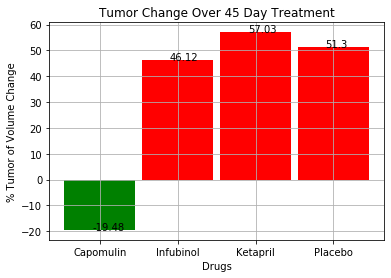

In [82]:
# Store all Relevant Percent Changes into a Tuple
perc_change_tuple = (capomulin_perc_change, infubinol_perc_change, ketapril_perc_change, placebo_perc_change)
perc_change_tuple

# Splice the data between passing and failing drugs
bars = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
height = perc_change_tuple
y = np.arange(len(bars))

# Orient widths. Add labels, tick marks, etc.
width = 1/1.10
plt.bar(y, height, width, color=['green', 'red', 'red', 'red'])
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel('Drugs')
plt.xticks(y, bars)
plt.ylabel('% Tumor of Volume Change')

# Call functions to implement the function calls
for a,b in zip(y, height):
    plt.text(a - 0.10, b, str(b))

# Save the Figure
plt.savefig('tumor-change-over-45-day-treatment.png')

# Show the Figure
plt.show()